 **Step 1: Reading & Understanding the**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv('/content/UsedCarsSA_Clean_EN.csv')

In [ ]:
cars.shape

(8035, 13)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [ ]:
cars.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


**Step 2: Data Cleaning and Preparation**

In [ ]:
# Checking for duplicated rows

print("Number of duplicate rows: ", sum(cars.duplicated()))

Number of duplicate rows:  3


In [ ]:
# Drop duplicate rows

cars.drop_duplicates(inplace=True)

In [ ]:
print("Number of duplicate rows: ", sum(cars.duplicated()))

Number of duplicate rows:  0


In [ ]:
cars

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [ ]:
# Check for missing values

cars.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

**Renaming unclear columns**

In [ ]:
cars = cars.rename(columns={"Type": "Model"})
cars.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


**Dropping irrelevant columns**

In [ ]:
cars = cars.drop(['Negotiable'], axis=1)
cars.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500


In [ ]:

cars.describe()

,Year,Engine_Size,Mileage,Price
count,8032.000000,8032.000000,8.032000e+03,8.032000e+03
mean,2014.097112,3.287774,1.491528e+05,5.369923e+04
std,5.758021,1.518001,3.475122e+05,7.199385e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.017855e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.362500e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


Notice that Mileage has maximum value of 20,000,000. This is not possible! Also, for Price column, we notice that 25% of the values are zero. In a later step, I'm going to deal with these extreme values.

In [ ]:
# Summary Statistics for categorical variables
cars.describe(exclude="number")

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8032,8032,8032,8032,8032,8032,8032,8032
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2037,372,5961,3477,3191,7858,6968,3236


Toyota Land Cruiser is the most selling car

and White is most preferable color

For car sales, Riyadh is the most popular city.

In [ ]:
# To check rows with Price represented as'0'.
cars[cars.Price == 0]

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0


In [ ]:
# Dropping the rows having price equal to zero
cars = cars[cars['Price'] != 0]
cars

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000
...,...,...,...,...,...,...,...,...,...,...,...,...
8029,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000


**To check the values in price column. Let's sort the colunm in an ascending order.**



In [ ]:
cars.sort_values(by='Price', ascending=1, inplace=True)

<ipython-input-98-a3307eabad5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.sort_values(by='Price', ascending=1, inplace=True)


We can clearly notice that there is values that seems not realistic to consider

 as a car price. In order to not skew the results
  
I decided to drop the rows that contains price less that 5000 Riyal.

In [ ]:
cars = cars[cars['Price'] > 5000]

**Also, I will drop the values that exceeds 700,000 km in Mileage column, for the same reason**

In [ ]:
cars = cars[cars['Mileage'] < 700000]
cars.head(10)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
7624,Mercedes,SEL,1986,Saudi,Silver,Full,3.0,Gas,Automatic,500000,Tabouk,5500
5565,Other,Other,2021,Other,Yellow,Semi Full,1.2,Gas,Manual,3000,Jeddah,5500
1208,Kia,Optima,2006,Other,White,Standard,1.3,Gas,Manual,290000,Taef,6000
5038,Mercury,Grand Marquis,2001,Other,Blue,Semi Full,4.6,Gas,Automatic,33000,Riyadh,6000
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500
2809,Honda,Other,2011,Saudi,Black,Standard,1.0,Gas,Manual,4200,Jeddah,6500
6928,Suzuki,D'max,2001,Other,White,Full,1.0,Diesel,Manual,1000,Jeddah,7000


**Step 3: Visualizing the Data**

<ipython-input-101-cd43f1e38400>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.Price)


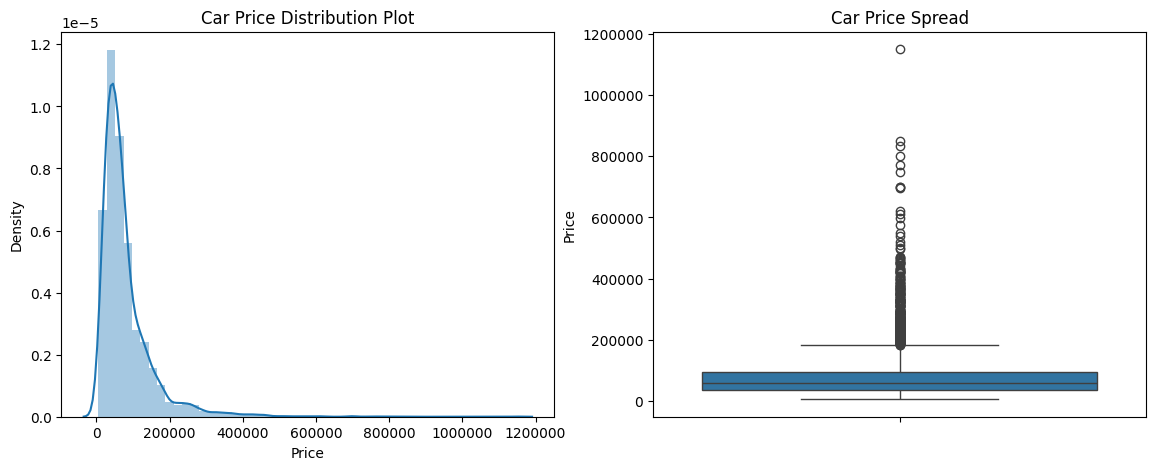

In [ ]:
plt.figure(figsize=(14,5))

#plot 1
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

#plot 2
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [ ]:
print(cars.Price.describe())


count    5.376000e+03
mean     8.001565e+04
std      7.508601e+04
min      5.500000e+03
25%      3.650000e+04
50%      5.900000e+04
75%      9.500000e+04
max      1.150000e+06
Name: Price, dtype: float64


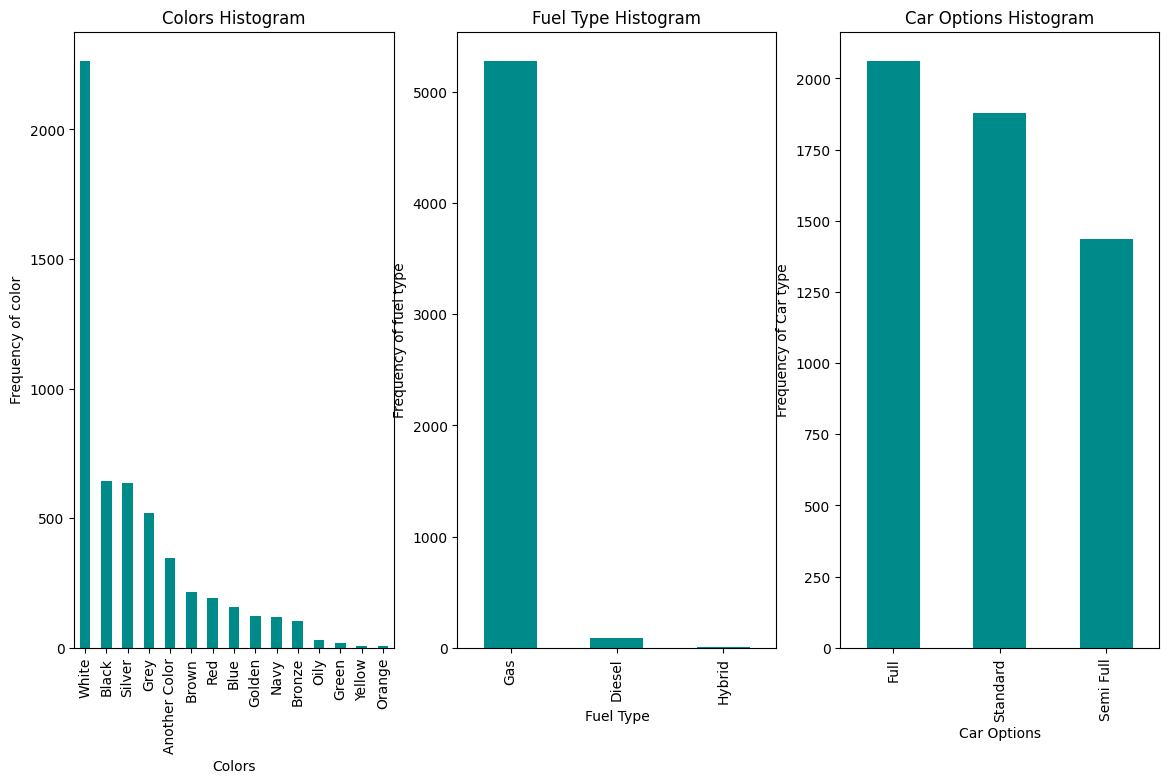

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = cars.Color.value_counts().plot(kind='bar', color="DarkCyan")
plt.title('Colors Histogram')
plt1.set(xlabel = 'Colors', ylabel='Frequency of color')

plt.subplot(1,3,2)
plt2 = cars.Fuel_Type.value_counts().plot(kind='bar',color="DarkCyan")
plt.title('Fuel Type Histogram')
plt2.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt3 = cars.Options.value_counts().plot(kind='bar', color="DarkCyan")
plt.title('Car Options Histogram')
plt3.set(xlabel = 'Car Options', ylabel='Frequency of Car type')

plt.show()

Insights:

- White is the most flavorable color for buyers.

- Number of Gas fueled cars is very high compared to Diesel cars.

- Full Option cars seems to be more preferable for car sales than other options.

Text(0, 0.5, 'Count of Cars')

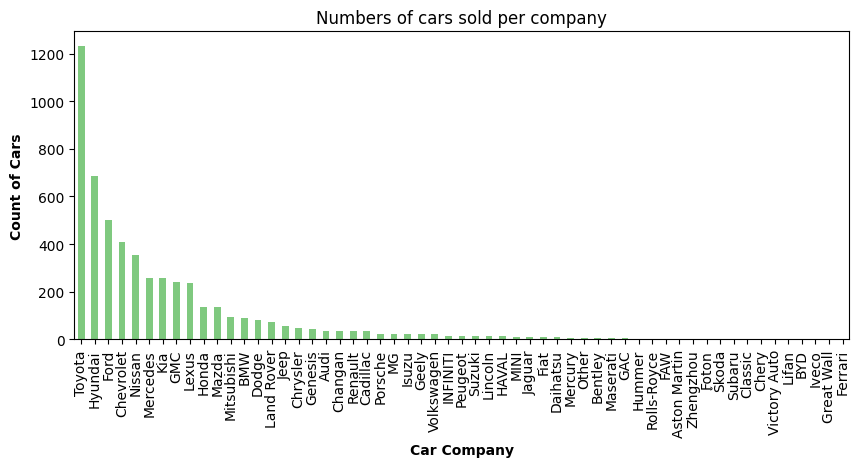

In [ ]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [10,4]
ax = cars['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Insights:

Toyota, Hyundai, and Ford are among the most cars sold as used cars.

Ferrari, Great Wall, and Victory Auto are the lowest sold cars.

<ipython-input-105-b72d4ec5efc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cars.Options, palette=("cubehelix"))
<ipython-input-105-b72d4ec5efc6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars.Options, y=cars.Price, palette=("cubehelix"))


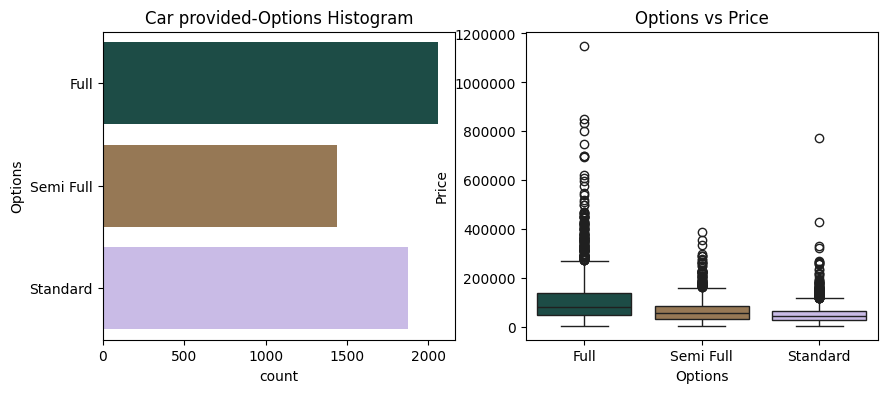

In [ ]:
# To view the relationship between Car Options and the price
plt.figure(figsize=(10,4))
#plot 1
plt.subplot(1,2,1)

plt.title('Car provided-Options Histogram')
sns.countplot(cars.Options, palette=("cubehelix"))
#plot 2
plt.subplot(1,2,2)
plt.title('Options vs Price')
sns.boxplot(x=cars.Options, y=cars.Price, palette=("cubehelix"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

Insights:

Full Option cars has higher spread out in price compared to the other options.



<ipython-input-106-25c4a003553d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cars.Gear_Type, palette=("plasma"))
<ipython-input-106-25c4a003553d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars.Gear_Type, y=cars.Price, palette=("plasma"))


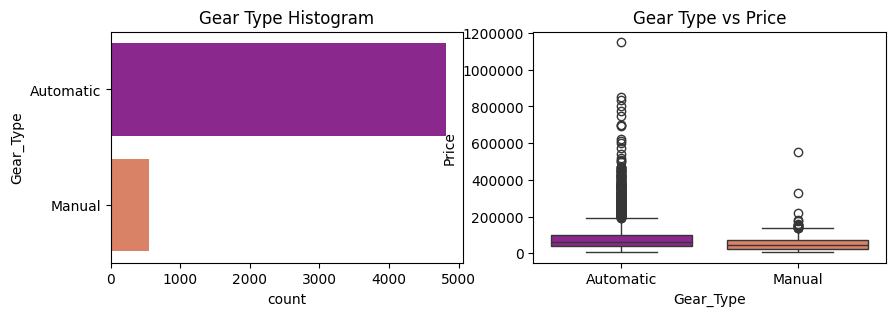

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Gear Type Histogram')
sns.countplot(cars.Gear_Type, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Gear Type vs Price')
sns.boxplot(x=cars.Gear_Type, y=cars.Price, palette=("plasma"))

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

insights:

Only few Manual cars are being sold. However, difference in the average price of those is not so big compared to Automatic cars.

<Figure size 500x500 with 0 Axes>

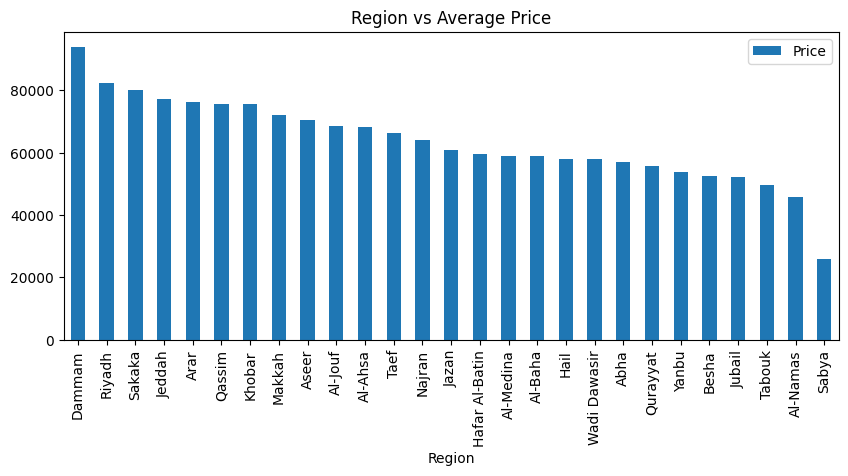

In [ ]:
plt.figure(figsize=(5,5))

df = pd.DataFrame(cars.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Region vs Average Price')
plt.show()

Dammam, Riyadh, and Sakaka cities where the cars are moslty sold.

<Figure size 1000x500 with 0 Axes>

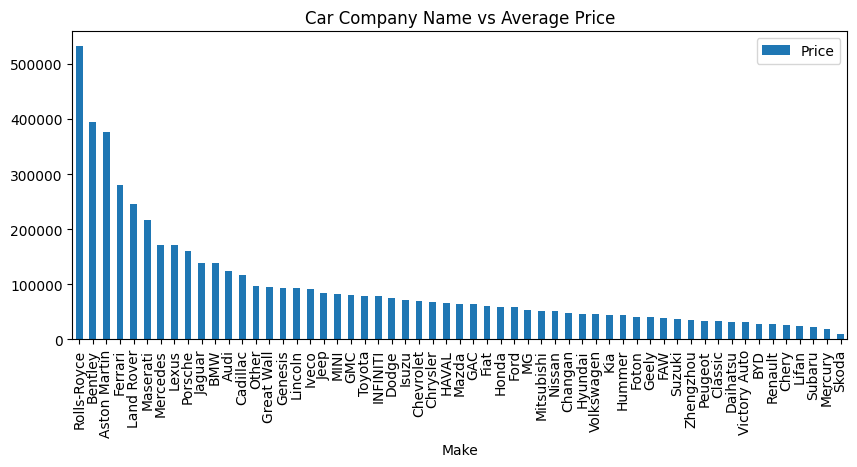

In [ ]:
plt.figure(figsize=(10, 5))

df = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()


Insights:

Skoda, Mercury, and Subaru are cheapest sold cars.

Rolls-Royce, Bentley, and Aston Martin have the highest average price.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 500x500 with 0 Axes>

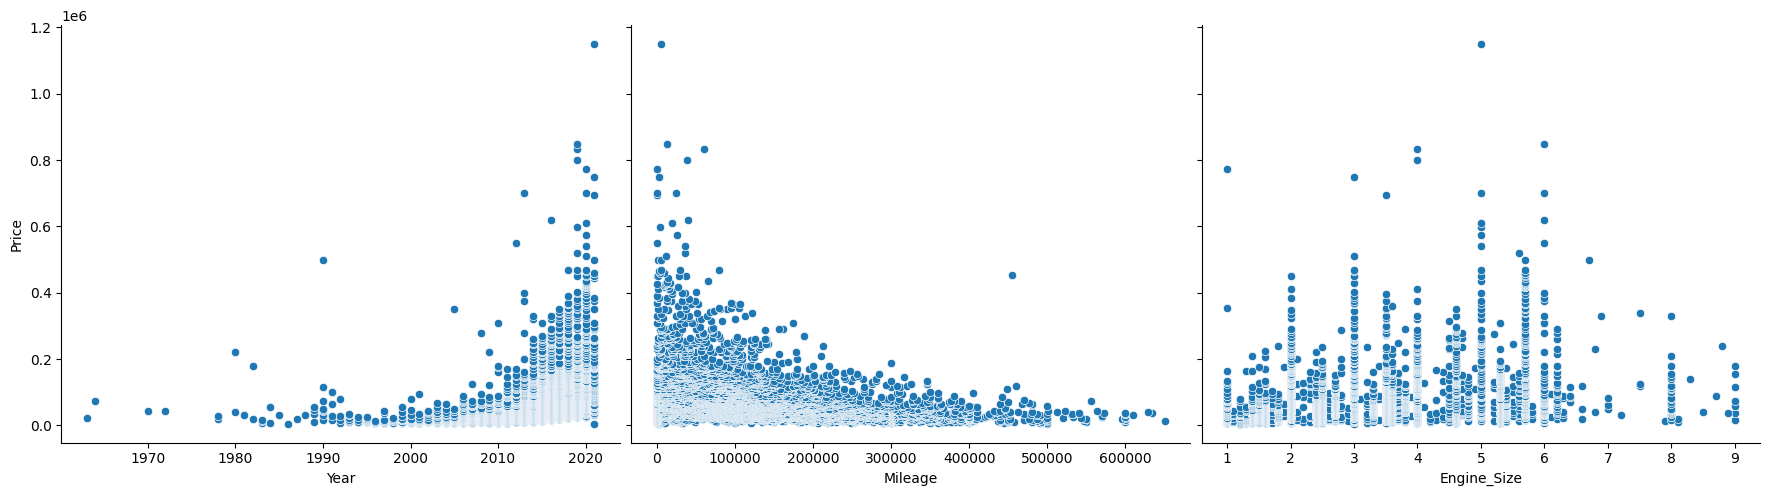

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(cars, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

Inference:

Year of manufacting seems to have a positive correlation with price, which is expected.

Mileage appears to have a negative correlation with price.

Engine_Size have a week correlation with the price.

**Calculate the Correlation**

In [ ]:
cars.corr(numeric_only=True)

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.225543,-0.402725,0.320826
Engine_Size,-0.225543,1.000000,0.155094,0.306201
Mileage,-0.402725,0.155094,1.000000,-0.285978
Price,0.320826,0.306201,-0.285978,1.000000


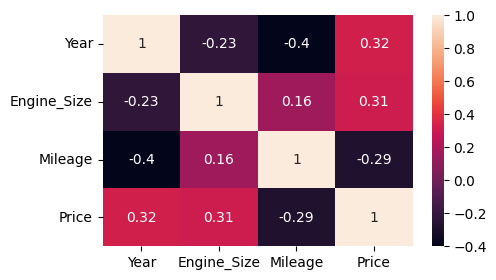

In [ ]:
# to check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(5,3))
sns.heatmap(cars.corr(numeric_only=True),annot=True)
plt.show()

From the heatmap:

 we can see the Year, and Engine_Size are positively correlated variables to price.

Whereas Mileage is negatively correlated.

**Step 4: Featue Engineering**

In [ ]:
# Take only significat variables
cars_sig = cars[['Make','Year', 'Color', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [ ]:
cars_sig

,Make,Year,Color,Options,Engine_Size,Gear_Type,Mileage,Price
7624,Mercedes,1986,Silver,Full,3.0,Automatic,500000,5500
5565,Other,2021,Yellow,Semi Full,1.2,Manual,3000,5500
1208,Kia,2006,White,Standard,1.3,Manual,290000,6000
5038,Mercury,2001,Blue,Semi Full,4.6,Automatic,33000,6000
2063,Ford,2001,White,Standard,4.6,Automatic,350000,6000
...,...,...,...,...,...,...,...,...
3182,Bentley,2020,Black,Standard,1.0,Automatic,300,772500
4038,Mercedes,2019,Black,Full,4.0,Automatic,39000,800000
3826,Mercedes,2019,Grey,Full,4.0,Automatic,60000,835000
5913,Bentley,2019,Another Color,Full,6.0,Automatic,13000,850000


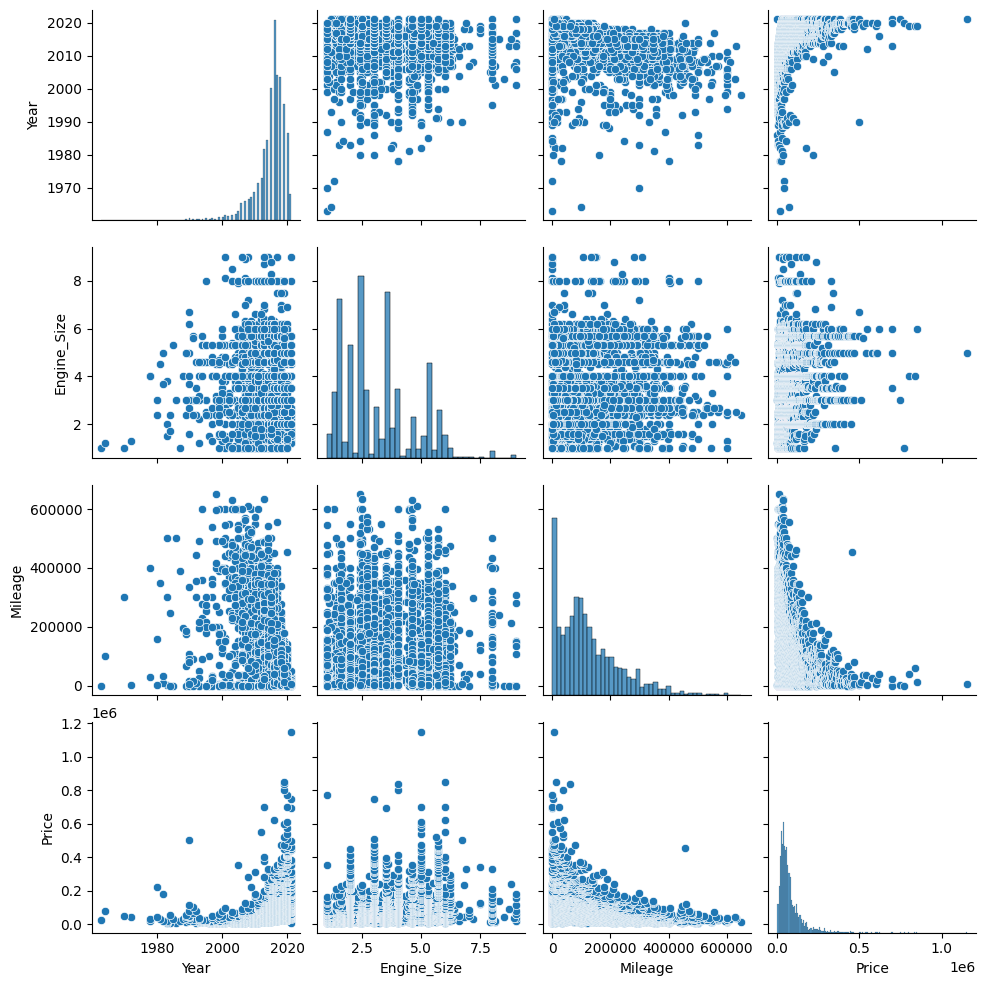

In [ ]:
# plot relationships in the dataset
sns.pairplot(cars_sig)
plt.show()